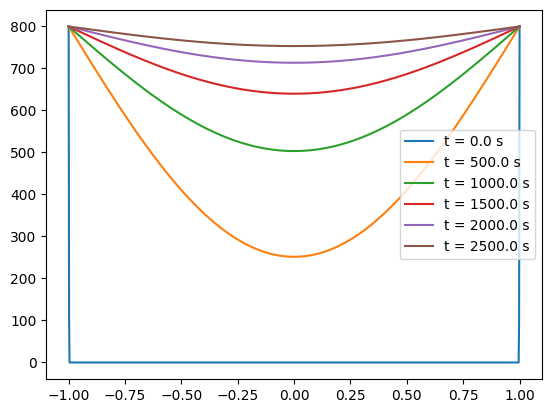

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# parameters
number_of_points = 1001
L = 2
delta_x = L / (number_of_points - 1)
delta_t = 0.001  # time step
D_T = 0.0005
ca = 10**-10
beita = 0.007

r = D_T * delta_t / delta_x**2
assert r <= 0.5, "Time step too large! Reduce delta_t."

max_time_steps = 3000000
plot_times = range(0, max_time_steps, 500000)

# boundary condition
T = np.zeros(number_of_points)
T[0] = T[-1] = 800  # Dirichlet boundary condition

# Find index for x=0 (middle point)
mid_index = number_of_points // 2

# List to store T(0,t) values
T0_values = []
time_steps = []

def update_temperature(T, T_new, r, delta_t, ca, beita):
    T_new[1:-1] = T[1:-1] + r * (T[2:] - 2*T[1:-1] + T[:-2]) + delta_t * ca * np.exp(beita * T[1:-1])
    return T_new

# FDM 
T_new = np.copy(T)
for step in range(max_time_steps):
    T_new = update_temperature(T, T_new, r, delta_t, ca, beita)
    
    # Store T(0,t) value at every step
    T0_values.append(T_new[mid_index])
    time_steps.append(step * delta_t)  # Convert step count to real time

    if step in plot_times:
    
        plt.plot(np.linspace(-1, 1, number_of_points), T_new, label=f't = {step * delta_t} s')
        
    T[:] = T_new[:]  

plt.legend()
plt.show()


In [37]:
tolerance=1e-6


T = np.zeros(number_of_points)
T[0] = T[-1] = 500  




T_new_1 = np.copy(T)

while True:  

    T_new_1[1:-1] = T[1:-1] + r * (T[2:] - 2*T[1:-1] + T[:-2]) + delta_t * ca * np.exp(beita * T[1:-1])


    max_diff = np.max(np.abs(T_new_1 - T))


    if max_diff < tolerance:

        break

    T[:] = T_new_1[:]
    step += 1  


x = np.linspace(-1, 1, number_of_points)
plt.plot(x, T_new_1, label="Steady-State Temperature")
plt.xlabel("x (Position)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.grid()
plt.show()


KeyboardInterrupt: 

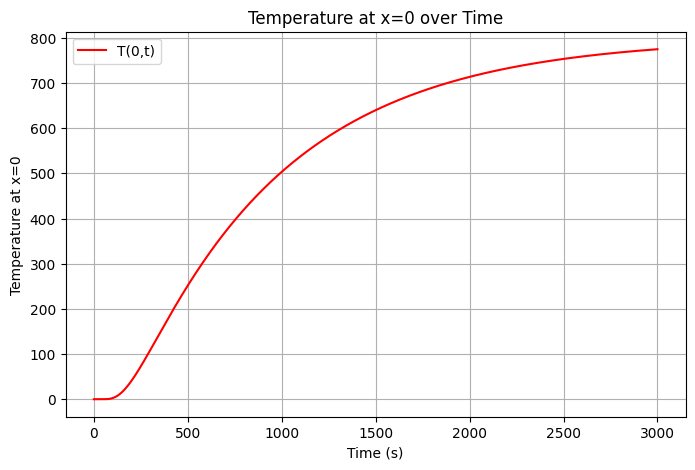

In [44]:
# Plot T(0,t) vs. time
plt.figure(figsize=(8, 5))
plt.plot(time_steps, T0_values, label="T(0,t)", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Temperature at x=0")
plt.title("Temperature at x=0 over Time")
plt.grid()
plt.legend()
plt.show()